In [23]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
#connection with SQL to extract the data

In [25]:
conn = mysql.connector.connect(
    user="root",
    password="Sanchez7913.",
    host="localhost",
    database="world_layoffs"
    
)

cursor = conn.cursor()

In [26]:
query = """
       SELECT*
       FROM layoffs_staging2;
"""

cursor.execute(query)

In [27]:
columns = [col[0] for col in cursor.description]

In [28]:
results = cursor.fetchall()
cursor.close()
conn.close()

In [29]:
layoff_staging = pd.DataFrame(results, columns=columns)

In [30]:
layoff_staging.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Included Health,SF Bay Area,Healthcare,NaN,0.06,2022-07-25,Series E,United States,272.0
1,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0
2,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0
3,100 Thieves,Los Angeles,Consumer,12.0,None,2022-07-13,Series C,United States,120.0
4,10X Genomics,SF Bay Area,Healthcare,100.0,0.08,2022-08-04,Post-IPO,United States,242.0


In [31]:
layoff_staging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13975 entries, 0 to 13974
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                13975 non-null  object 
 1   location               13975 non-null  object 
 2   industry               13968 non-null  object 
 3   total_laid_off         11331 non-null  float64
 4   percentage_laid_off    11018 non-null  object 
 5   date                   13968 non-null  object 
 6   stage                  13940 non-null  object 
 7   country                13975 non-null  object 
 8   funds_raised_millions  12820 non-null  float64
dtypes: float64(2), object(7)
memory usage: 982.7+ KB


In [32]:
layoff_staging.dtypes

company                   object
location                  object
industry                  object
total_laid_off           float64
percentage_laid_off       object
date                      object
stage                     object
country                   object
funds_raised_millions    float64
dtype: object

In [33]:
layoff_staging.describe()

,total_laid_off,funds_raised_millions
count,11331.000000,12820.000000
mean,238.093284,874.245944
std,769.803967,6020.249205
min,3.000000,0.000000
25%,36.000000,50.000000
50%,80.000000,162.000000
75%,180.000000,450.250000
max,12000.000000,121900.000000


#### CLEANING THE DATA

In [34]:
#dealing with missing values

In [36]:
layoff_staging.isnull().sum()

company                     0
location                    0
industry                    7
total_laid_off           2644
percentage_laid_off      2957
date                        7
stage                      35
country                     0
funds_raised_millions    1155
dtype: int64

In [45]:
layoff_staging['total_laid_off'] = layoff_staging['total_laid_off'].fillna(layoff_staging['total_laid_off'].median()) # filling nan values with the median
layoff_staging['percentage_laid_off'] = layoff_staging['percentage_laid_off'].fillna(layoff_staging['percentage_laid_off'].median()) # filling nan values with the median
layoff_staging = layoff_staging[layoff_staging['industry'].notna()] # dropping missing values in industry column
layoff_staging = layoff_staging[layoff_staging['date'].notnull()] # dropping missing values in date column
layoff_staging["stage"] = layoff_staging["stage"].fillna("Unknown") #replace nan values to unkown
layoff_staging['funds_raised_millions'] = layoff_staging.groupby('stage')['funds_raised_millions'].transform(lambda x: x.fillna(x.median())) # filling nan values with the median

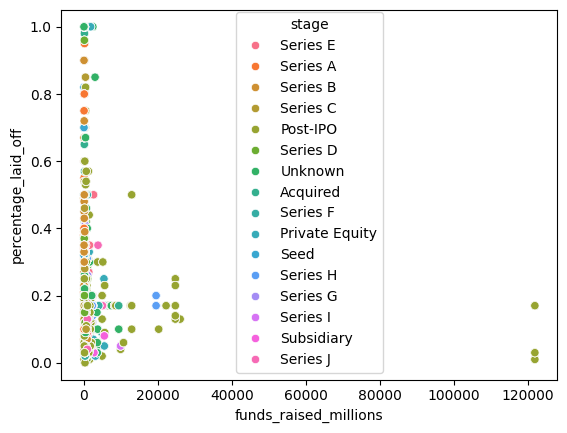

In [47]:
sns.scatterplot(data=layoff_staging, x="funds_raised_millions", y="percentage_laid_off", hue="stage")
plt.show()

In [39]:
layoff_staging[layoff_staging["stage"] == "Unknown"]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
6,2TM,Sao Paulo,Crypto,90.0,0.12,2022-06-01,Unknown,Brazil,250.0
7,2TM,Sao Paulo,Crypto,100.0,0.15,2022-09-01,Unknown,Brazil,250.0
12,80 Acres Farms,Cincinnati,Food,80.0,0.1,2023-01-18,Unknown,United States,275.0
20,Acko,Mumbai,Finance,45.0,0.09,2020-04-01,Unknown,India,143.0
21,Acorns,Portland,Finance,50.0,None,2020-05-26,Unknown,United States,207.0
...,...,...,...,...,...,...,...,...,...
13935,Zume,SF Bay Area,Food,200.0,0.67,2020-04-15,Unknown,United States,423.0
13936,Zume,SF Bay Area,Food,200.0,0.67,2020-04-15,Unknown,United States,423.0
13937,Zume,SF Bay Area,Food,200.0,0.67,2020-04-15,Unknown,United States,423.0
13938,Zume,SF Bay Area,Food,200.0,0.67,2020-04-15,Unknown,United States,423.0


In [40]:
layoff_staging['percentage_laid_off'] = layoff_staging['percentage_laid_off'].str.replace('%', '').astype(float) #convert it to float
layoff_staging["date"] = pd.to_datetime(layoff_staging["date"], errors="coerce") #convert it to datetime

In [41]:
layoff_staging.groupby("stage")["funds_raised_millions"].median()

stage
Acquired            71.0
Post-IPO           400.0
Private Equity     220.0
Seed                 3.0
Series A            21.0
Series B            60.0
Series C           133.0
Series D           256.0
Series E           426.0
Series F           496.0
Series G          1100.0
Series H          1900.0
Series I          1600.0
Series J          3800.0
Subsidiary        2400.0
Unknown            165.0
Name: funds_raised_millions, dtype: float64

In [42]:
layoff_staging.dtypes

company                          object
location                         object
industry                         object
total_laid_off                  float64
percentage_laid_off             float64
date                     datetime64[ns]
stage                            object
country                          object
funds_raised_millions           float64
dtype: object

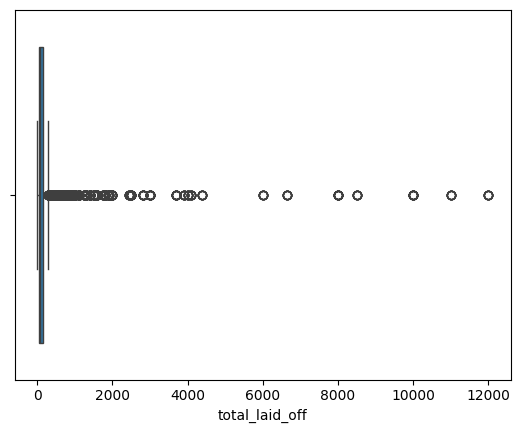

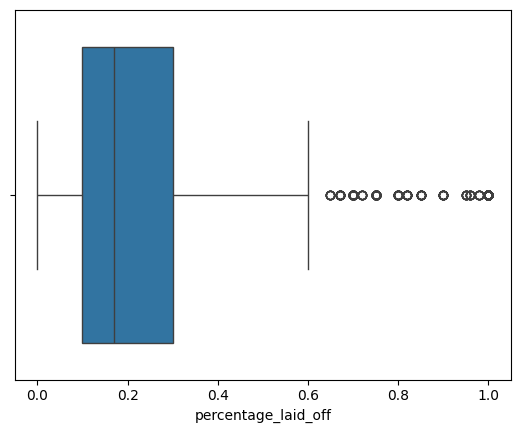

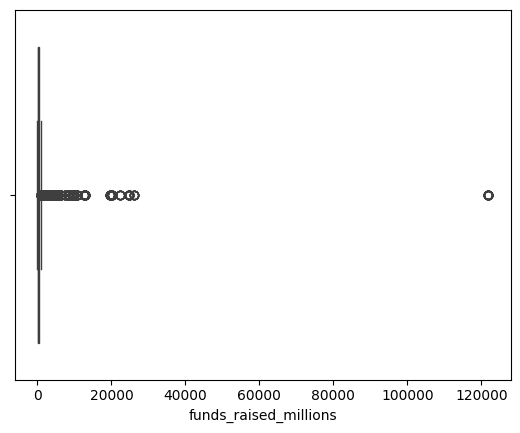

In [43]:
numeric_cols = layoff_staging.select_dtypes(include='number').columns


for col in numeric_cols:
    sns.boxplot(data=layoff_staging, x=col)
    plt.show()


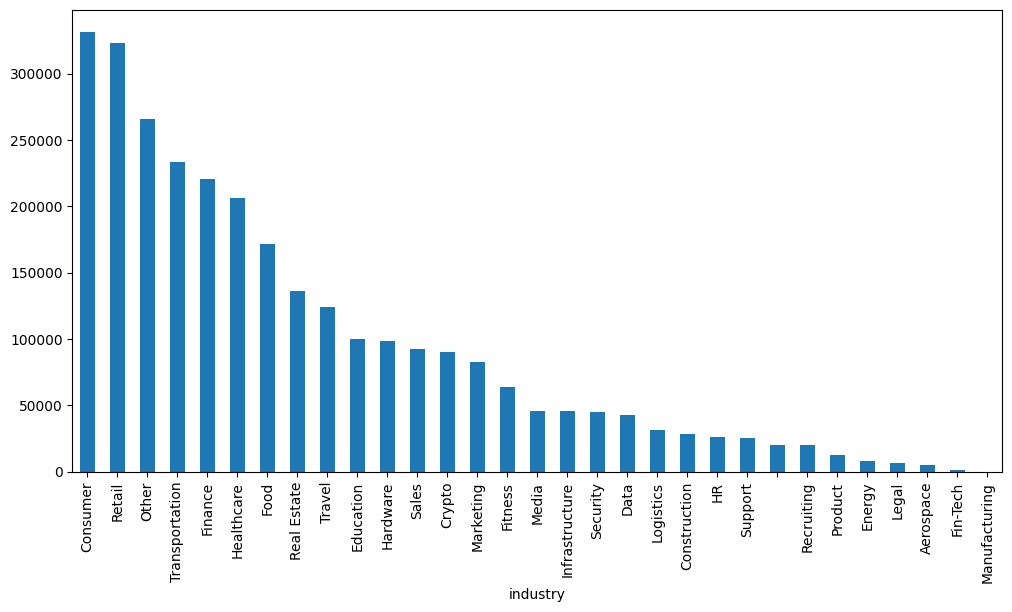

In [46]:
layoff_staging.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.show()